# TSL DATA ANALYSIS

In [1]:
#import required libraries
import pandas as pd #for data processing and reading
import numpy as np #for linear algebra processing
import matplotlib.pyplot as plt #For visualization
import seaborn as sns #for visualization

C:\Users\Public\DSNanaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading the excel file
df=pd.read_excel('tsldata.xlsx', sheet_name='Data')

In [3]:
df.head()

,No.,Loading Date,Dispatch Date,Expected Delivery Date,Actual Delivery Date,TNo,Reg. No.,TK No.,Contract,Driver's No.,...,Destination,Client,Trip Type,Issuing Station,Qty Issued,Docket No.,Diesel Trip,KM Covered,Cost Of Diesel,Km Bands
0,1,2017-01-01,2017-01-01,2017-01-01,2017-01-01,T358,NaN,NaN,TEXACO-EVAP,11296,...,VI,TEXACO,Local,NaN,15,NaN,NaN,15,50,Less than 50kms
1,2,2017-01-01,2017-01-01,2017-01-01,2017-01-01,T358,NaN,NaN,TEXACO-EVAP,11296,...,VI,TEXACO,Local,NaN,-,NaN,NaN,-,-,Above 1000kms
2,3,2017-01-01,2017-01-01,2017-01-01,2017-01-01,T614,NaN,NaN,NAIJA CEMENT,12497,...,PAPALANTO,NAIJA CEMENT,LOCAL,NAIJA CEMENT,52.2,441044,NaN,52.2,116,50 - 200kms
3,4,2017-01-01,2017-01-01,2017-01-01,2017-01-01,T644,NaN,NaN,NAIJA CEMENT,12575,...,OREGUN,NAIJA CEMENT,INTERDISTRICT,NAIJA CEMENT,70.2,440392,NaN,70.2,156,50 - 200kms
4,5,2017-01-01,2017-01-01,2017-01-01,2017-01-01,T619,NaN,NaN,NAIJA CEMENT,12301,...,OREGUN,NAIJA CEMENT,INTERDISTRICT,NAIJA CEMENT,70.2,440387,NaN,70.2,156,50 - 200kms


In [4]:
#Finding and knowing the shape(size) of the dataset
df.shape

(12405, 31)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12405 entries, 0 to 12404
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   No.                     12405 non-null  int64         
 1   Loading Date            12405 non-null  datetime64[ns]
 2   Dispatch Date           12405 non-null  datetime64[ns]
 3   Expected Delivery Date  12405 non-null  datetime64[ns]
 4   Actual Delivery Date    12405 non-null  datetime64[ns]
 5   TNo                     12405 non-null  object        
 6   Reg. No.                0 non-null      float64       
 7   TK No.                  0 non-null      float64       
 8   Contract                12405 non-null  object        
 9   Driver's No.            12405 non-null  int64         
 10  Driver's Name           12405 non-null  object        
 11  Logistics Coord.        11032 non-null  object        
 12  Loading Depot           12405 non-null  object

In [6]:
#Changing the object datatype to float
df['Sales Revenue']=pd.to_numeric(df['Sales Revenue'],errors='coerce')
df['Trip Allowance']=pd.to_numeric(df['Trip Allowance'],errors='coerce')
df['Loading Fee']=pd.to_numeric(df['Loading Fee'],errors='coerce')
df['Qty Issued']=pd.to_numeric(df['Qty Issued'],errors='coerce')
df['KM Covered']=pd.to_numeric(df['KM Covered'],errors='coerce')
df['Cost Of Diesel']=pd.to_numeric(df['Cost Of Diesel'],errors='coerce')
df['Diesel Trip']=pd.to_numeric(df['Diesel Trip'],errors='coerce')

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12405 entries, 0 to 12404
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   No.                     12405 non-null  int64         
 1   Loading Date            12405 non-null  datetime64[ns]
 2   Dispatch Date           12405 non-null  datetime64[ns]
 3   Expected Delivery Date  12405 non-null  datetime64[ns]
 4   Actual Delivery Date    12405 non-null  datetime64[ns]
 5   TNo                     12405 non-null  object        
 6   Reg. No.                0 non-null      float64       
 7   TK No.                  0 non-null      float64       
 8   Contract                12405 non-null  object        
 9   Driver's No.            12405 non-null  int64         
 10  Driver's Name           12405 non-null  object        
 11  Logistics Coord.        11032 non-null  object        
 12  Loading Depot           12405 non-null  object

In [8]:
df.describe()

,No.,Reg. No.,TK No.,Driver's No.,Qty Loaded,Qty Delivered,Unit Rate,Sales Revenue,Trip Allowance,Loading Fee,Qty Issued,Diesel Trip,KM Covered,Cost Of Diesel
count,12405.000000,0.0,0.0,12405.000000,12405.000000,12405.000000,12168.000000,1.240300e+04,11254.000000,10436.000000,12262.000000,9971.000000,12284.000000,12260.000000
mean,6203.000000,NaN,NaN,11666.306247,22501.673519,22507.293833,900.410326,1.712804e+05,11056.427492,6906.511115,163.138242,172.196793,336.780110,26647.614640
std,3581.159379,NaN,NaN,1315.445376,19649.191235,19648.539925,6079.101627,1.863637e+05,33413.034728,5674.216056,260.096416,275.899500,568.909352,49325.181946
min,1.000000,NaN,NaN,10030.000000,40.000000,40.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3102.000000,NaN,NaN,10939.000000,40.000000,40.000000,2.140000,4.708000e+04,3000.000000,2000.000000,22.500000,22.500000,22.500000,276.750000
50%,6203.000000,NaN,NaN,11734.000000,22000.000000,22000.000000,7.650000,9.630000e+04,5000.000000,5850.000000,22.500000,22.500000,50.000000,4279.500000
75%,9304.000000,NaN,NaN,12399.000000,44998.000000,44998.000000,183.000000,2.398940e+05,10000.000000,11600.000000,198.000000,216.450000,282.000000,26014.500000
max,12405.000000,NaN,NaN,126704.000000,45068.000000,45068.000000,214891.500000,1.552956e+06,605000.000000,28000.000000,1457.100000,1457.100000,3238.000000,277140.420000


In [9]:
#correlation_matrix

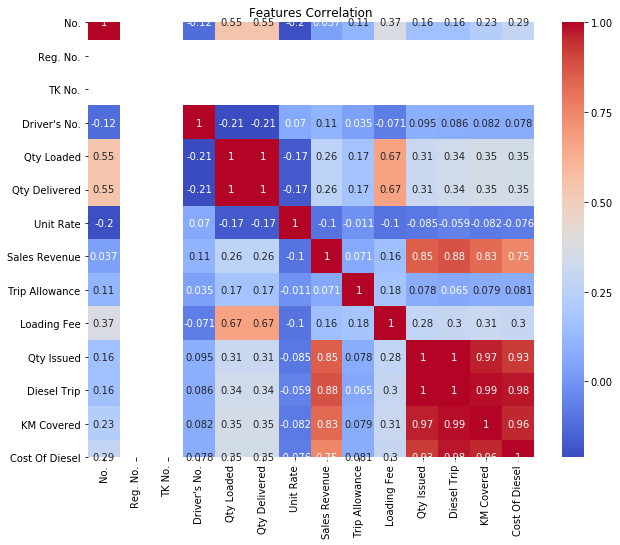

In [10]:
import seaborn as sns
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('Features Correlation')
plt.show()

In [11]:
#Finding the sum of null values in each column of the dataset
df.isna().sum()

No.                           0
Loading Date                  0
Dispatch Date                 0
Expected Delivery Date        0
Actual Delivery Date          0
TNo                           0
Reg. No.                  12405
TK No.                    12405
Contract                      0
Driver's No.                  0
Driver's Name                 0
Logistics Coord.           1373
Loading Depot                 0
Product                       0
Waybill                    1406
Qty Loaded                    0
Qty Delivered                 0
Unit Rate                   237
Sales Revenue                 2
Trip Allowance             1151
Loading Fee                1969
Destination                   0
Client                      152
Trip Type                    31
Issuing Station            3668
Qty Issued                  143
Docket No.                 6004
Diesel Trip                2434
KM Covered                  121
Cost Of Diesel              145
Km Bands                      0
dtype: i

In [12]:
df_file='Cleaned_tsl_dataset.xlsx'
df.to_excel(df_file,sheet_name='Cleaned_tsl_dataset')

In [13]:
#Exploring all the table column names
print(df.columns.tolist())

['No.', 'Loading Date', 'Dispatch Date', 'Expected Delivery Date', 'Actual Delivery Date', 'TNo', 'Reg. No.', 'TK No.', 'Contract', "Driver's No.", "Driver's Name", 'Logistics Coord.', 'Loading Depot', 'Product', 'Waybill', 'Qty Loaded', 'Qty Delivered', 'Unit Rate', 'Sales Revenue', 'Trip Allowance', 'Loading Fee', 'Destination', 'Client', 'Trip Type', 'Issuing Station', 'Qty Issued', 'Docket No.', 'Diesel Trip', 'KM Covered', 'Cost Of Diesel', 'Km Bands']


#Analyzing the Categorical Features
For Exploring Analytical Features

# How many trips do we have within the Km bands in chart
:

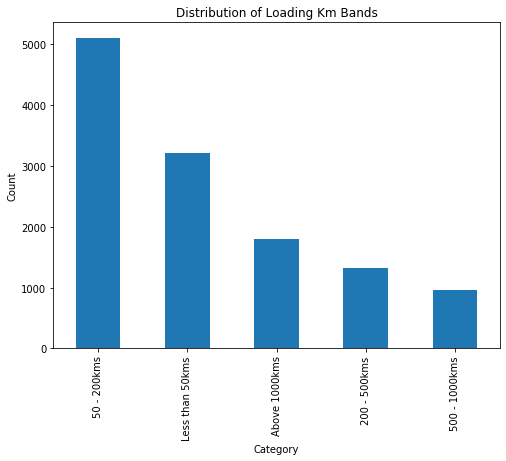

In [14]:
plt.figure(figsize=(8,6))
df['Km Bands'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Loading Km Bands')
plt.show()

In [15]:
km_bands_counts= df['Km Bands'].value_counts().sort_index()
km_bands_counts

200 - 500kms       1322
50 - 200kms        5105
500 - 1000kms       966
Above 1000kms      1798
Less than 50kms    3214
Name: Km Bands, dtype: int64

In [16]:
km_bands_counts_file='Trips thin KM.xlsx'
km_bands_counts.to_excel(km_bands_counts_file,sheet_name='Trips within KM')

# 1b. How many trips do we have within the KM Bands?

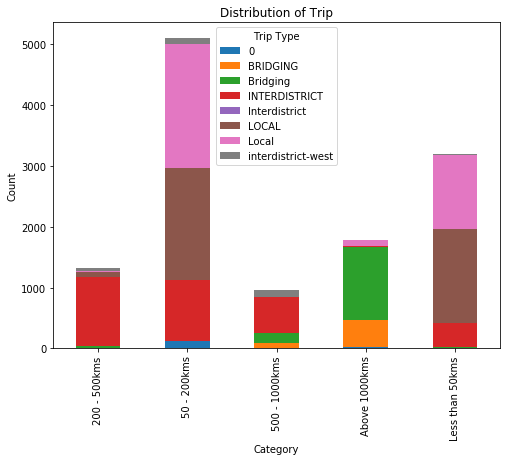

In [17]:
groupedd_kmtrip= df.groupby(['Km Bands','Trip Type']).size().unstack()

groupedd_kmtrip.plot(kind='bar', stacked=True, figsize=(8,6))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Trip')
plt.show()

In [18]:
groupedd_kmtrip

Trip Type,0,BRIDGING,Bridging,INTERDISTRICT,Interdistrict,LOCAL,Local,interdistrict-west
Km Bands,,,,,,,,
200 - 500kms,8.0,4.0,33.0,1127.0,NaN,89.0,9.0,52.0
50 - 200kms,125.0,3.0,NaN,1001.0,1.0,1828.0,2052.0,95.0
500 - 1000kms,2.0,82.0,162.0,604.0,NaN,NaN,NaN,116.0
Above 1000kms,24.0,441.0,1207.0,4.0,1.0,3.0,96.0,13.0
Less than 50kms,1.0,NaN,22.0,392.0,NaN,1541.0,1215.0,21.0


# 2a. Identifying High flyers products based on volumes(tons), trips, Kilometers(kms), and revenue

# Volume(Tons)

In [19]:
#converting volumes in litres to tons
conversion_factors={
    'CEMENT':1,
    'AGO':0.000885,
    'ATK':0.00084,
    'PMS':0.000737,
    'PMSAGO':0.000737
}

df['Qty Delivered in Tons']=df.apply(lambda row: row['Qty Delivered']* conversion_factors[row['Product']],axis=1)

df['Qty Delivered in Tons']

0         8.850000
1         4.425000
2        40.000000
3        40.000000
4        40.000000
           ...    
12400    16.214000
12401     8.107000
12402    24.321000
12403    16.214000
12404     8.107737
Name: Qty Delivered in Tons, Length: 12405, dtype: float64

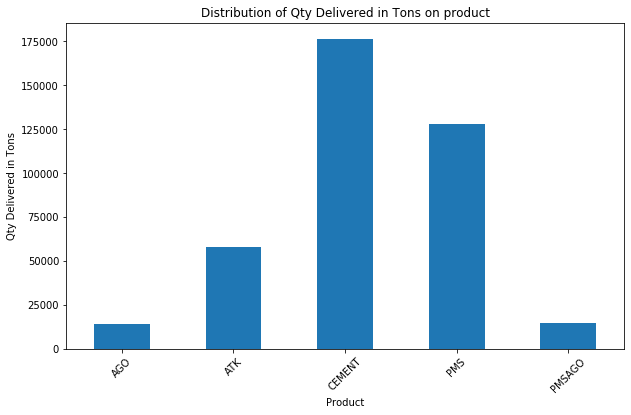

In [20]:
grouped_QD=df.groupby('Product')['Qty Delivered in Tons'].sum()

plt.figure(figsize=(10,6))
grouped_QD.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Qty Delivered in Tons')
plt.title('Distribution of Qty Delivered in Tons on product')
plt.xticks(rotation=45)
plt.show()

In [21]:
grouped_QD

Product
AGO        14040.047985
ATK        58334.286360
CEMENT    176640.000000
PMS       128150.080322
PMSAGO     14618.832778
Name: Qty Delivered in Tons, dtype: float64

In [22]:
grouped_QD_file='Highflyers_on Volume.xlsx'
grouped_QD.to_excel(grouped_QD_file,sheet_name='Highflyers_on Volume')

# Sales Revenue

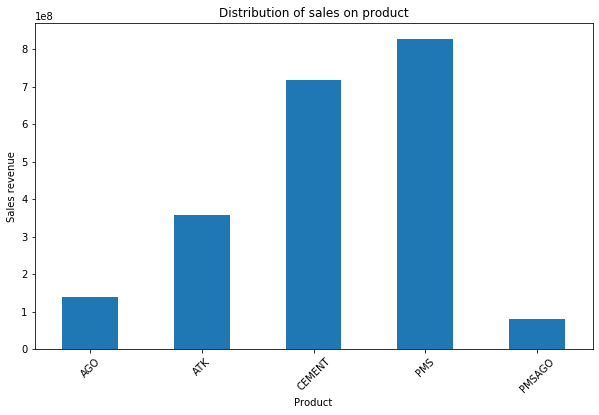

In [23]:
grouped_SR=df.groupby('Product')['Sales Revenue'].sum()
plt.figure(figsize=(10,6))
grouped_SR.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Sales revenue')
plt.title('Distribution of sales on product')
plt.xticks(rotation=45)
plt.show()

In [24]:
grouped_SR

Product
AGO       1.395059e+08
ATK       3.570430e+08
CEMENT    7.186364e+08
PMS       8.280603e+08
PMSAGO    8.114475e+07
Name: Sales Revenue, dtype: float64

In [25]:
grouped_SR_file='Highflyers_on Sales.xlsx'
grouped_SR.to_excel(grouped_QD_file,sheet_name='Highflyers_on Sales')

# KM Covered

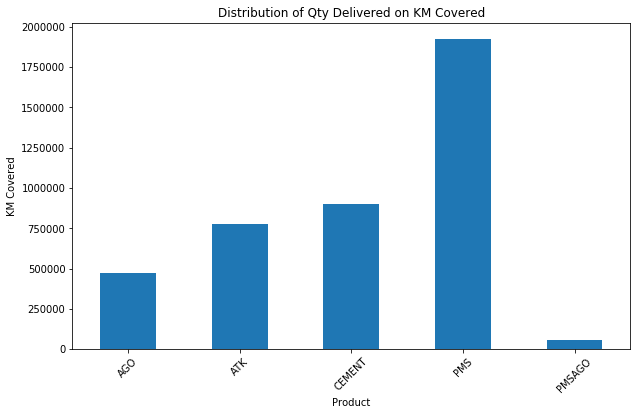

In [26]:
grouped_KM=df.groupby('Product')['KM Covered'].sum()

plt.figure(figsize=(10,6))
grouped_KM.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('KM Covered')
plt.title('Distribution of Qty Delivered on KM Covered')
plt.xticks(rotation=45)
plt.show()

In [27]:
grouped_KM_file='Highflyers_on KM.xlsx'
grouped_KM.to_excel(grouped_QD_file,sheet_name='Highflyers_on KM')

# TRip Allowance

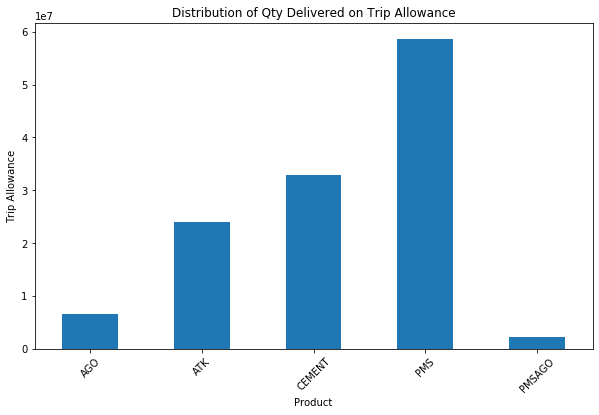

In [28]:
grouped_TA=df.groupby('Product')['Trip Allowance'].sum()
plt.figure(figsize=(10,6))
grouped_TA.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Trip Allowance')
plt.title('Distribution of Qty Delivered on Trip Allowance')
plt.xticks(rotation=45)
plt.show()

In [29]:
grouped_TA

Product
AGO        6716110.0
ATK       23933645.0
CEMENT    32817000.0
PMS       58696660.0
PMSAGO     2265620.0
Name: Trip Allowance, dtype: float64

In [30]:
grouped_TA_file='Highflyers_on Trips.xlsx'
grouped_TA.to_excel(grouped_QD_file,sheet_name='Highflyers_on Trips')

# Top 10 drivers That generate the most revenue

In [31]:
grouped_driver_revenue=df.groupby('Driver\'s Name')['Sales Revenue'].sum()
top_10_drivers=grouped_driver_revenue.nlargest(10)
print(top_10_drivers)

Driver's Name
Mathias Bradley       5.613837e+07
Kylie Allison         1.840988e+07
Brendon Reeves        1.797299e+07
Melina Mitchell       1.739252e+07
Heather Villanueva    1.676516e+07
Jaliyah Parker        1.557031e+07
Gilbert Melton        1.551920e+07
Karly Swanson         1.523779e+07
Justice Francis       1.496998e+07
Cierra Adams          1.482477e+07
Name: Sales Revenue, dtype: float64


In [32]:
grouped_driver_revenue_file='Top_10_drivers.xlsx'
grouped_driver_revenue.to_excel(grouped_driver_revenue_file,sheet_name='Top_10_drivers')

# Top 5 Contractors that Generate the most revenue

In [33]:
grouped_contract_revenue=df.groupby('Contract')['Sales Revenue'].sum()
top_5_contract=grouped_contract_revenue.nlargest(5)
print(top_5_contract)

Contract
CARDINAL FUELS NG    7.235385e+08
NAIJA CEMENT         4.505530e+08
TEXACO-ATK           2.716233e+08
CEMENT CO NIG        2.680834e+08
TEXACO-50            1.705850e+08
Name: Sales Revenue, dtype: float64


In [34]:
grouped_contract_revenue

Contract
CARDINAL FUELS NG    7.235385e+08
CEMENT CO NIG        2.680834e+08
GE OIL & GAS         7.962480e+07
NAIJA CEMENT         4.505530e+08
TEXACO-50            1.705850e+08
TEXACO-ATK           2.716233e+08
TEXACO-EVAP          2.776350e+06
TEXACO-PMS           1.576060e+08
Name: Sales Revenue, dtype: float64

In [35]:
grouped_contract_revenue_file='Top_5_Contract.xlsx'
grouped_contract_revenue.to_excel(grouped_contract_revenue_file,sheet_name='Top_5_Contract')

#  What month of the year the highest revenue was generated

In [36]:
df['Loading Date']=pd.to_datetime(df['Loading Date'])
df['month']=df['Loading Date'].dt.month
grouped_month_data=df.groupby('month')['Sales Revenue'].sum()
highest_revenue_month = grouped_month_data.idxmax()
print(highest_revenue_month)
month_names=['January','February', 'March','April','May', 'June', 'July','August','September', 'october',
             'November', 'December']
highest_revenue_month_names=month_names[highest_revenue_month-1]
print(highest_revenue_month_names)
grouped_month_data

2
February


month
1     4.163147e+08
2     4.417745e+08
3     1.607936e+08
4     1.526136e+08
5     1.188170e+08
6     1.354400e+08
7     1.170918e+08
8     1.052606e+08
9     1.373569e+08
10    1.553632e+08
11    1.766464e+08
12    6.918089e+06
Name: Sales Revenue, dtype: float64

In [37]:
df['Actual Delivery Date']=pd.to_datetime(df['Actual Delivery Date'])
df['month']=df['Actual Delivery Date'].dt.month
grouped_month_data=df.groupby('month')['Sales Revenue'].sum()
highest_revenue_month = grouped_month_data.idxmax()
print(highest_revenue_month)

2


In [38]:
grouped_month_data

month
1     3.958256e+08
2     4.295533e+08
3     1.774398e+08
4     1.421377e+08
5     1.316192e+08
6     1.388379e+08
7     1.203245e+08
8     1.056031e+08
9     1.183783e+08
10    1.699816e+08
11    1.791707e+08
12    1.551878e+07
Name: Sales Revenue, dtype: float64

In [39]:
grouped_month_data_file='Highest_Revenue_Month.xlsx'
grouped_month_data.to_excel(grouped_month_data_file,sheet_name='Highest Revenue Month')

# Efficiency Ratio

# KM/Trip Covered Efficiency Ratio

In [41]:
df['KM Covered Efficiency Ratio']=df['KM Covered']/df['Trip Allowance']

In [42]:
df['KM Covered Efficiency Ratio']

0        0.00500
1            NaN
2        0.01044
3        0.00780
4        0.00780
          ...   
12400    0.01000
12401        NaN
12402    0.01000
12403    0.01000
12404        NaN
Name: KM Covered Efficiency Ratio, Length: 12405, dtype: float64